## Activity on Semiconductor Physics

A semiconductor has a finite potential well defined by a width of a = 3A and a height of V0 = 3 eV.

1. Plot the energy spectrum of the potential and find the first two allowed energy levels within the well.

2. Find the correct effective mass m∗ = x · me, where me is the electron mass.


--- Solution with m* = m_e (free electron) ---
Found energy levels (eV): [0.5425086700497938, 2.0152043666645802]


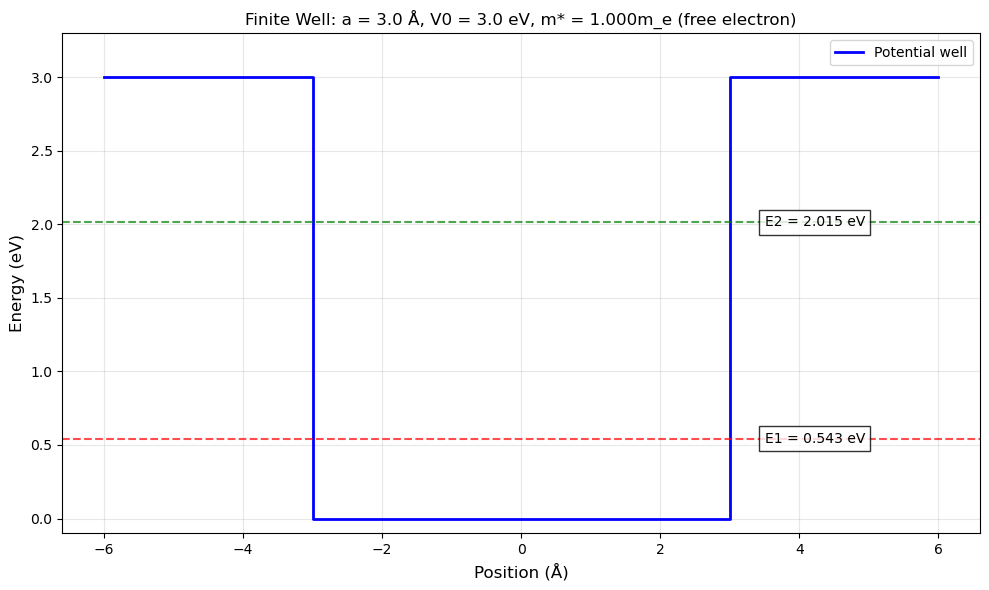


--- Searching for m* that gives E1 = 0.6 eV ---
Effective mass found: m* = 0.865590 · m_e

Allowed levels with this effective mass (eV):
E1 = 0.600000 eV
E2 = 2.192321 eV


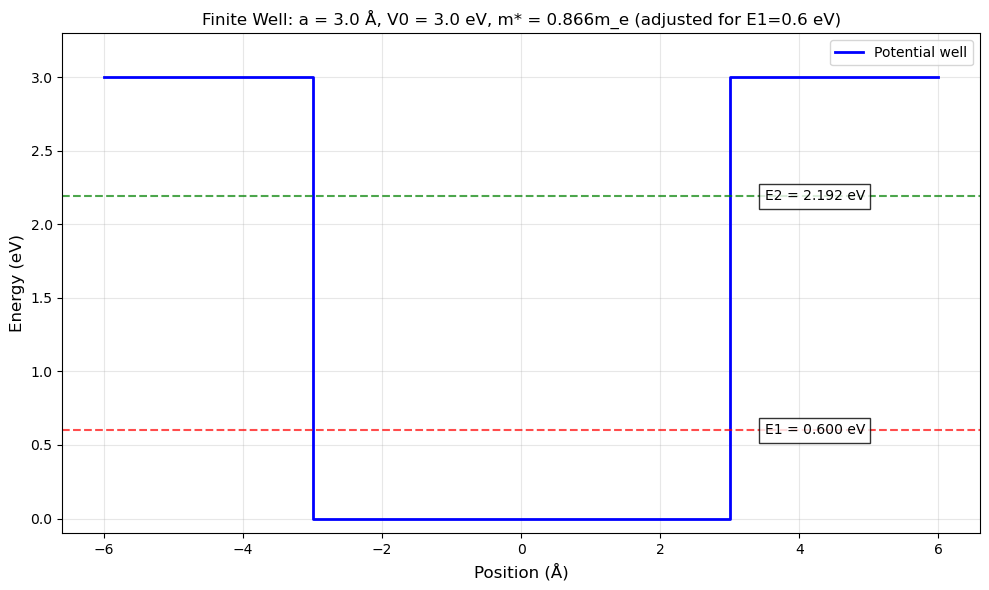


--- Plotting energy levels vs well depth ---


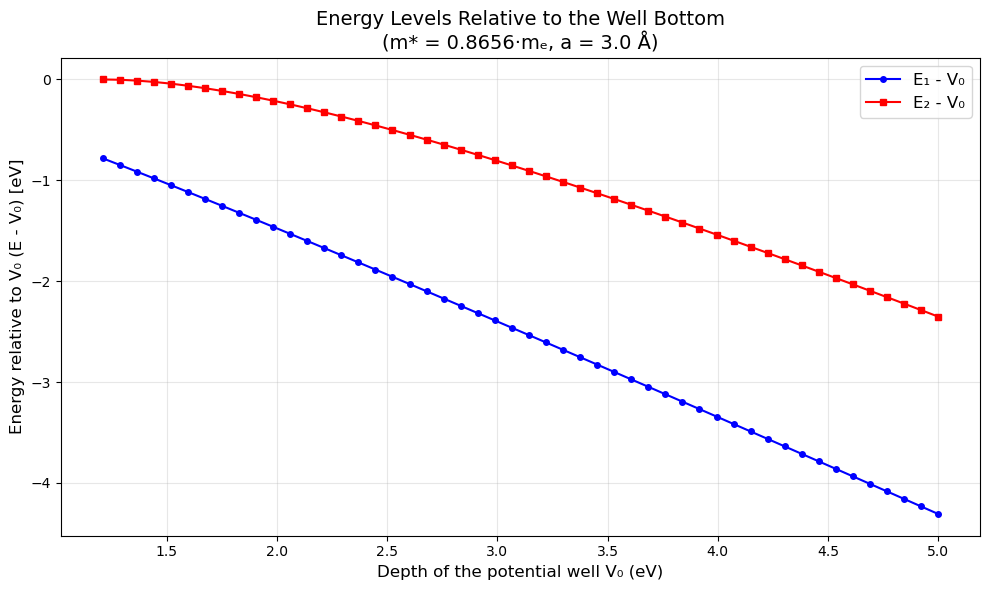

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import warnings

# Ignore fsolve RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Physical constants
hbar = 1.055e-34  # J·s
m_e = 9.11e-31    # kg
eV = 1.602e-19    # J
a = 3e-10         # m
V0 = 3 * eV       # J

"""1. CALCULATE THE FIRST TWO ALLOWED ENERGY LEVELS """

""" To calculate the energy levels, the Schrodinger equation is solved taking into account the region inside the well."""
def calculate_energy_levels(m_eff, V0_custom=None):
    """Calculates energy levels for a given effective mass and potential depth"""
    V0_used = V0_custom if V0_custom is not None else V0
    m = m_eff * m_e
    r_squared = (2 * m * V0_used * a**2) / hbar**2     # (equation 11/14)
    r = np.sqrt(r_squared)

    # Implicit functions
    def even_func(chi):
        try:
            eta = -chi * np.tan(chi)             # η = - χ tan(χ)      (equation 9)
            return chi**2 + eta**2 - r_squared   # χ^2 + η^2 - r^2     (equation 10)
        except:
            return np.nan

    def odd_func(chi):
        try: 
            eta = -chi / np.tan(chi)            # η = - χ / tan(χ)     (equation 12)
            return chi**2 + eta**2 - r_squared  # χ^2 + η^2 - r^2      (equation 13)
        except:
            return np.nan


    """ The even and odd functions do not have exact algebraic solutions, so we look for the intersections of the functions."""
    """ Find  χ """
    # Find roots for even and odd functions
    even_roots = []
    odd_roots = []

    for i in range(1, 20):
        # For even functions
        try:
            guess_even = i * np.pi / 2 - 0.3
            root_even = fsolve(even_func, guess_even)[0]
            if (0 < root_even < r and
                not any(np.isclose(root_even, even_roots, atol=0.05)) and
                abs(even_func(root_even)) < 1e-2):
                even_roots.append(root_even)
        except:
            pass

        # For odd functions
        try:
            guess_odd = i * np.pi - 0.3
            root_odd = fsolve(odd_func, guess_odd)[0]
            if (0 < root_odd < r and
                not any(np.isclose(root_odd, odd_roots, atol=0.05)) and
                abs(odd_func(root_odd)) < 1e-2):
                odd_roots.append(root_odd)
        except:
            pass

    # Calculate energies
    """ Once a valid χ is found, the electron's energy is: """
    def energy(chi):
        return (hbar**2 * chi**2) / (2 * m * a**2)  # E = ħ^2 χ^2 / 2 m a^2 

    even_energies = [energy(c) / eV for c in even_roots]
    odd_energies = [energy(c) / eV for c in odd_roots]

    return sorted(even_energies + odd_energies)

    
"""2. FIND THE CORRECT EFFECTIVE MASS """

"""Finds the effective mass that produces the desired energy level"""

def find_mass_for_energy(target_energy):
    """Finds the effective mass that produces the desired energy level"""
    def objective(m_eff):
        levels = calculate_energy_levels(m_eff)
        return levels[0] - target_energy if levels else np.nan
    
    try:
        sol = fsolve(objective, 0.05)[0]
        return sol
    except:
        return None

""" 3. RELATIONSHIP BETWEEN ENERGY LEVELS AND THE DEPTH OF THE DEPTH OF THE POTENTIAL WELL """
def plot_energy_vs_depth(m_eff, V0_range_eV=np.linspace(0.5, 10, 100)):
    """Graph relative energies (E - V0) vs V0 for a fixed effective mass"""
    energies_E1 = []
    energies_E2 = []
    
    for V0_eV in V0_range_eV:
        V0_J = V0_eV * eV
        levels = calculate_energy_levels(m_eff, V0_J)
        if len(levels) > 0:
            E1_rel = levels[0] - V0_eV  # Relative to bottom of the well
            energies_E1.append(E1_rel)
            E2_rel = levels[1] - V0_eV if len(levels) > 1 else np.nan
            energies_E2.append(E2_rel)
        else:
            energies_E1.append(np.nan)
            energies_E2.append(np.nan)

    # Plot the relative energy vs depth
    plt.figure(figsize=(10, 6))
    plt.plot(V0_range_eV, energies_E1, 'o-', label="E₁ - V₀", color="blue", markersize=4)
    plt.plot(V0_range_eV, energies_E2, 's-', label="E₂ - V₀", color="red", markersize=4)
    
    plt.xlabel("Depth of the potential well V₀ (eV)", fontsize=12)
    plt.ylabel("Energy relative to V₀ (E - V₀) [eV]", fontsize=12)
    plt.title(f"Energy Levels Relative to the Well Bottom\n(m* = {m_eff:.4f}·mₑ, a = {a*1e10:.1f} Å)", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    
# Visualization of 1 and 2
def plot_results(levels, m_eff, title_suffix=""):
    """Plots the potential well and energy levels"""
    plt.figure(figsize=(10, 6))
    
    # Draw the well
    x = np.array([-2*a, -a, -a, a, a, 2*a]) * 1e10  # In Ångstroms
    y = np.array([V0/eV, V0/eV, 0, 0, V0/eV, V0/eV])
    plt.plot(x, y, 'b-', lw=2, label='Potential well')
    
    # Draw energy levels
    colors = ['r', 'g', 'm', 'c']
    for i, E in enumerate(levels):
        plt.axhline(E, color=colors[i % len(colors)], ls='--', alpha=0.7)
        plt.text(3.5, E, f"E{i+1} = {E:.3f} eV", va='center', 
                 bbox=dict(facecolor='white', alpha=0.8))
    
    plt.xlabel("Position (Å)", fontsize=12)
    plt.ylabel("Energy (eV)", fontsize=12)
    plt.title(f"Finite Well: a = {a*1e10:.1f} Å, V0 = {V0/eV:.1f} eV, m* = {m_eff:.3f}m_e {title_suffix}")
    plt.ylim(-0.1, V0/eV + 0.3)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 1. Calculate and show levels with m* = m_e (free electron mass)
print("\n--- Solution with m* = m_e (free electron) ---")
levels_me = calculate_energy_levels(1.0)
print("Found energy levels (eV):", levels_me)
plot_results(levels_me, m_eff=1.0, title_suffix="(free electron)")

# 2. Find effective mass for E1 = 0.6 eV
"""The arbitrary value of E = 0.6 is taken since it is a representative value for real semiconductors 
and satisfies the following: m∗<me """

target_E1 = 0.6
print(f"\n--- Searching for m* that gives E1 = {target_E1} eV ---")
m_eff_opt = find_mass_for_energy(target_E1)

if m_eff_opt:
    print(f"Effective mass found: m* = {m_eff_opt:.6f} · m_e")
    levels_opt = calculate_energy_levels(m_eff_opt)
    print("\nAllowed levels with this effective mass (eV):")
    for i, E in enumerate(levels_opt):
        print(f"E{i+1} = {E:.6f} eV")
    plot_results(levels_opt, m_eff=m_eff_opt, title_suffix="(adjusted for E1=0.6 eV)")
    
# 3. Plot energy vs well depth for the optimized mass
    print("\n--- Plotting energy levels vs well depth ---")
    # V₀ > ħ²π²/(8ma²), Therefore the minimun value of V₀ should be 1,208
    plot_energy_vs_depth(m_eff_opt, V0_range_eV=np.linspace(1.208, 5.0, 50))
else:
    print("Could not find an effective mass that satisfies the condition.")

3. Explain the relationship between energy levels and the depth of the potential well.

The relationship between energy levels and the depth of the potential well is direct: as the depth of the well increases, more energy levels become allowed, and the existing levels move lower in energy relative to the top of the well.

This happens because a deeper potential well can "hold" the particle more tightly, allowing it to exist in more confined quantum states. In the code, this is shown in the function plot_energy_vs_depth, where the first two energy levels (E₁ and E₂) are calculated and plotted as the well depth V₀ increases.

For shallow wells (low V₀), only one or two bound states may exist.

As V₀ increases, the number of allowed bound states increases, and each level shifts downward, becoming more stable (i.e., more negative relative to the vacuum level).

This behavior is typical of quantum wells and reflects the quantization of energy in confined systems.